In [1]:
#Adapted from "2024-03-29_nudgeMacroparticleWeights.ipynb"

In [2]:
#PROBLEM! Bmad strips the IDs
# P = modifyAndSaveInputBeam(
#     inputBeamFilePath,
#     timeCenterTF = True);
# P.id
# array([1248183., 2994706., 2511880., ..., 2072128., 2829025., 2503797.])

# P = ParticleGroup(data=tao.bunch_data('L0AFEND'))
# P.id
# array([     1,      2,      3, ...,  99998,  99999, 100000])

#I'm going to deal with this by creating a new input file where the witness and driver particles have very, very slightly different weights
#Bmad (presumably...) retains weight data
# tao.bunch_data('L0AFEND')
# {'x': array([-0.00195192,  0.00030864, -0.0004523 , ..., -0.00071584,
#          0.00193254,  0.00020216]),
#  'px': array([-4420.96969495,  -685.02317667,   133.48213397, ...,
#          -342.74119023,  -922.60208893,   108.49622748]),
#  'y': array([ 8.59443329e-04, -2.54455833e-04,  1.89575995e-04, ...,
#          5.65670775e-04, -8.43240229e-05,  5.80456205e-04]),
#  'py': array([7467.50791431,  -33.53628711,  566.19673442, ..., 1441.97856318,
#         -143.50800545, 1806.11092054]),
#  't': array([-5.17371712e-12,  1.69013303e-12,  2.60064835e-13, ...,
#         -1.00286780e-12,  1.29688271e-12,  2.12125643e-13]),
#  'pz': array([65293100.65247   , 66168140.85241183, 66168857.13704683, ...,
#         66197878.14223742, 66172382.71861624, 66170620.39594007]),
#  'status': array([1, 1, 1, ..., 1, 1, 1], dtype=int32),
#  'weight': array([2.09820918e-14, 2.09820918e-14, 2.09820918e-14, ...,
#         2.09820918e-14, 2.09820918e-14, 2.09820918e-14]),
#  'z': array([0, 0, 0, ..., 0, 0, 0]),
#  'species': 'electron'}
;

''

In [3]:
from UTILITY_quickstart import *

In [4]:
filePath = os.getcwd()

In [5]:
inputBeamFilePath = f'{filePath}/beams/2024-07-01_Impact_TwoBunch/2024-07-01_twobunch.h5'
outputBeamFilePath = f'{filePath}/beams/2024-07-01_Impact_TwoBunch/2024-07-01_twobunch_nudgeWeights.h5'

In [ ]:
#This stuff is hardcoded, beware!

P = modifyAndSaveInputBeam(
    inputBeamFilePath,
    timeCenterTF = True);
print(P)

display(slicePlotMod(P, 'norm_emit_x', n_slice = 300, slice_key = "t"))

#By eye, pick the dividing line
witnessDriverSplitDeltaT = -1e-12

witnessIDs = P[P.t < witnessDriverSplitDeltaT].id
driverIDs = P[P.t > witnessDriverSplitDeltaT].id

print(f"Num driver / witness macroparticles: {np.size(driverIDs)} / {np.size(witnessIDs)}")

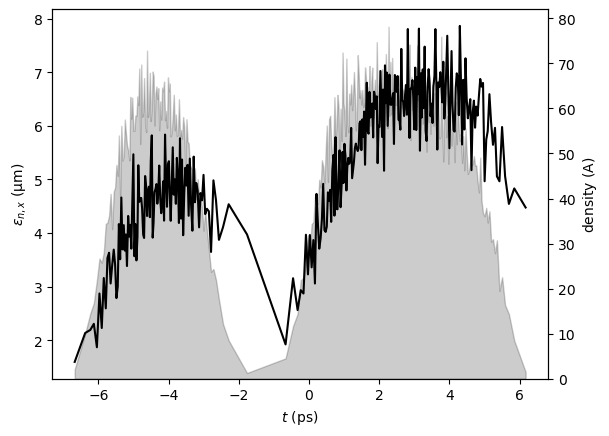

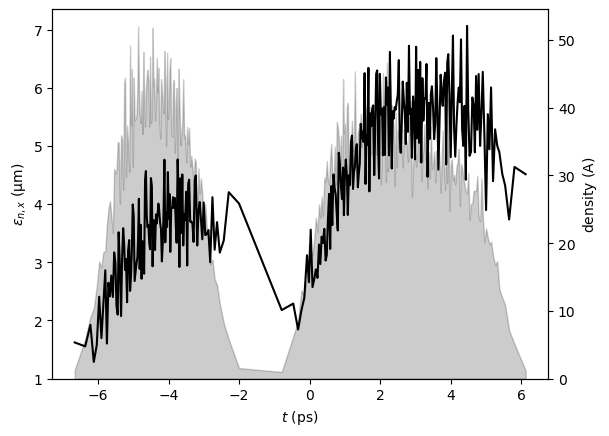

In [7]:
driverSubset = P[ np.isin(P.id, driverIDs) ]
witnessSubset = P[ np.isin(P.id, witnessIDs) ]

display(slicePlotMod(driverSubset, 'norm_emit_x', n_slice = 300, slice_key = "t"))
display(slicePlotMod(witnessSubset, 'norm_emit_x', n_slice = 300, slice_key = "t"))

In [8]:
startingWeight = P.weight[0]
startingWeight

witnessWeight = 0.999*startingWeight
driverWeight = 1.001*startingWeight

In [9]:
np.unique(P.weight)

array([1.6e-14])

In [10]:
newWeightArr = np.full(np.size(P.weight), -1.1)
for i in range(np.size(newWeightArr)):
    if P.t[i] < witnessDriverSplitDeltaT:
        newWeightArr[i] = witnessWeight
    else:
        newWeightArr[i] = driverWeight

In [11]:
P.weight = newWeightArr

In [12]:
np.unique(P.weight)

array([1.5984e-14, 1.6016e-14])

In [13]:
P.write(outputBeamFilePath)

In [14]:
del P 

#Now load in the new file to check it

P2 = ParticleGroup(outputBeamFilePath)
np.unique(P2.weight)

array([1.5984e-14, 1.6016e-14])